## Handling Nan Values


In [1]:
import datetime as dt
import yfinance as yf
import pandas as pd

stocks = ["AMZN","MSFT","INFY.NS","GOOG"]
adani_stocks = ["ADANIENT.NS", "ADANIPORTS.NS", "ADANIPOWER.NS", "ADANIGREEN.NS", "ADANIPORTS.NS" ]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
# filling NaN values
cl_price.fillna(method='bfill',axis=0,inplace=True) # We are using bfill because it won't have any effect in our backtesting section.  
# For example, if all the first 10 Nan values are filled with 69, the net return for every day would be 0. Thus, this won't create any problem for us. 

#dropping NaN values
cl_price.dropna(axis=0,how='any')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ADANIENT.NS,ADANIPORTS.NS,ADANIPOWER.NS,ADANIGREEN.NS
Date,,,,
2023-02-06,1572.699951,545.450012,182.350006,889.099976
2023-02-07,1802.949951,553.150024,173.250000,844.650024
2023-02-08,2164.250000,599.250000,181.899994,802.450012
2023-02-09,1925.699951,582.299988,172.800003,762.349976
2023-02-10,1846.949951,583.950012,164.199997,724.250000
2023-02-13,1717.650024,553.700012,156.000000,688.049988
2023-02-14,1749.699951,565.099976,148.199997,653.650024
2023-02-15,1779.099976,569.049988,140.800003,621.000000
2023-02-16,1796.599976,577.200012,147.800003,616.299988


Here we choose to bfill the nan values because doing so will have no effect on our backtesting code as the daily returns for those values will always be 0 and won't affect our backtesting model.


## OHLCV data and perform basic data operations

In [2]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

#familiarizing with data
cl_price.head(8) #prints the first 8 rows of the dataframe
cl_price.tail() #prints the last 5 rows of the dataframe
cl_price.describe() #performs summary statistic of each numerical columns in the datafrme

# Mean, Median, Standard Deviation
cl_price.mean() #calculates mean stock price for each stock
cl_price.median() #calculates median stock price for each stock
cl_price.std() #calculates standard deviation of stock price for each stock

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return = cl_price/cl_price.shift(1) - 1 #Performs same operation as above

daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ADANIENT.NS      0.073802
ADANIPORTS.NS    0.033646
ADANIPOWER.NS    0.045164
ADANIGREEN.NS    0.047093
dtype: float64

In [3]:
daily_return["ADANIENT.NS"].tail(20) * 100

Date
2023-03-08    2.861970
2023-03-09   -4.240924
2023-03-10   -2.915806
2023-03-13   -1.149664
2023-03-14   -7.266329
2023-03-15    5.799105
2023-03-16    0.261014
2023-03-17    1.776223
2023-03-20   -3.815518
2023-03-21    1.069284
2023-03-22   -0.485130
2023-03-23   -1.178805
2023-03-24   -2.973800
2023-03-27   -1.011115
2023-03-28   -7.092079
2023-03-29    8.717247
2023-03-31    0.577449
2023-04-03   -1.885230
2023-04-05   -1.132490
2023-04-06    3.300945
Name: ADANIENT.NS, dtype: float64

## OHLCV data and perform rolling operations

In [4]:

import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]

start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
daily_return.mean(axis=1) #prints mean daily return for each stock
daily_return.std() #prints standard deviation of daily returns for each stock

# Rolling operations (simple)
daily_return.rolling(window=10).mean()
daily_return.rolling(window=10).std()
daily_return.rolling(window=10).max()
daily_return.rolling(window=10).sum()

# Rolling operations (exponentialy weighted)
daily_return.ewm(com=10, min_periods=10).mean()
daily_return.ewm(com=10, min_periods=10).std()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ADANIENT.NS,ADANIPORTS.NS,ADANIPOWER.NS,ADANIGREEN.NS
Date,,,,
2023-02-06,NaN,NaN,NaN,NaN
2023-02-07,NaN,NaN,NaN,NaN
2023-02-08,NaN,NaN,NaN,NaN
2023-02-09,NaN,NaN,NaN,NaN
2023-02-10,NaN,NaN,NaN,NaN
2023-02-13,NaN,NaN,NaN,NaN
2023-02-14,NaN,NaN,NaN,NaN
2023-02-15,NaN,NaN,NaN,NaN
2023-02-16,NaN,NaN,NaN,NaN


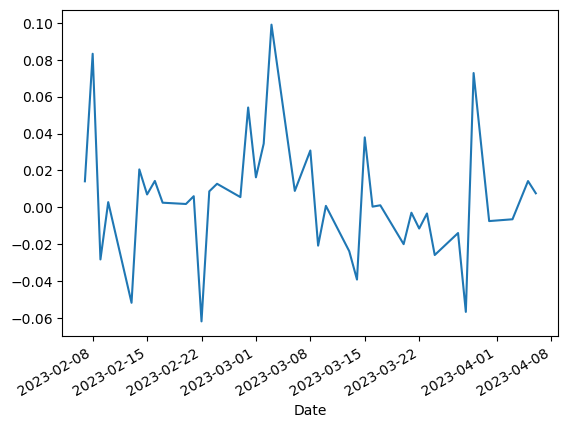

In [5]:
daily_return["ADANIPORTS.NS"].plot();

In [6]:
daily_return["ADANIPORTS.NS"].ewm(com=10, min_periods=10).mean().tail(20) * 100

Date
2023-03-08    2.035815
2023-03-09    1.609403
2023-03-10    1.452772
2023-03-13    1.065077
2023-03-14    0.565852
2023-03-15    0.886476
2023-03-16    0.802854
2023-03-17    0.735209
2023-03-20    0.469924
2023-03-21    0.396403
2023-03-22    0.248025
2023-03-23    0.192409
2023-03-24   -0.071727
2023-03-27   -0.196924
2023-03-28   -0.713284
2023-03-29    0.038470
2023-03-31   -0.035015
2023-04-03   -0.092350
2023-04-05    0.049084
2023-04-06    0.115329
Name: ADANIPORTS.NS, dtype: float64

## Import OHLCV data and perform basic visualizations

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: title={'center': 'Stock Price Evolution'}, xlabel='Date'>

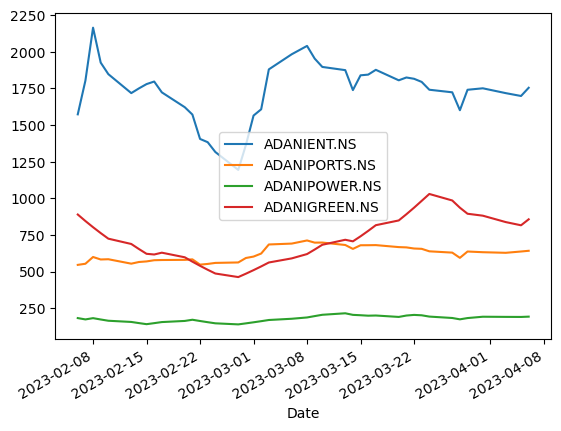

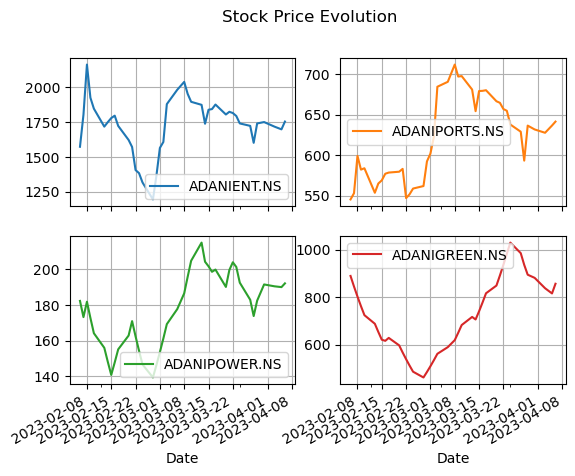

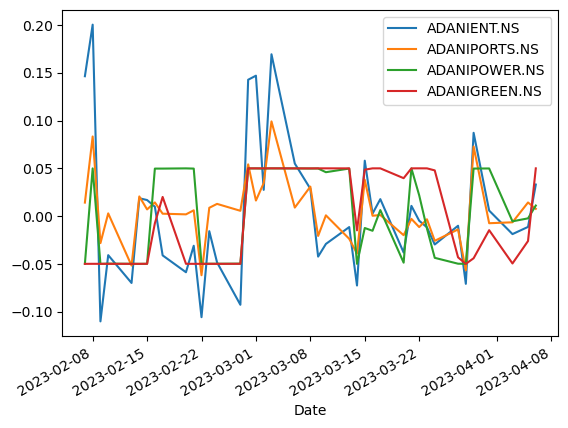

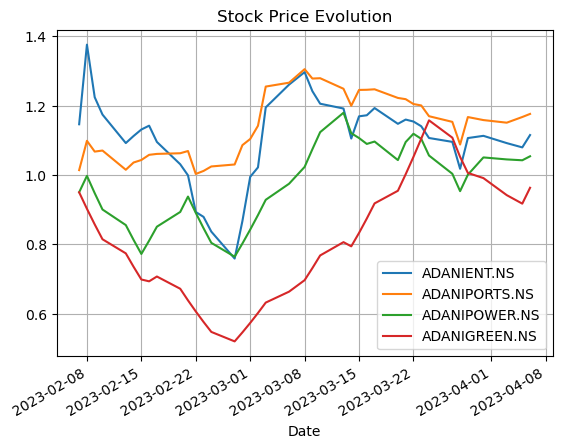

In [7]:
import datetime as dt
import yfinance as yf
import pandas as pd

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
  
#plotting close prices
cl_price.plot() 
cl_price.plot(subplots=True, layout = (2,2), title = "Stock Price Evolution", grid =True) # Subplots of the stocks
  
#plotting daily returns and cumulative returns    
daily_return.plot()
(1+daily_return).cumprod().plot(title = "Stock Price Evolution", grid =True)    
# cumprod is what we call running product in our leetcode problems 
    
    
    
    
    
    

## Import OHLCV data and perform visualizations using pyplot module

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


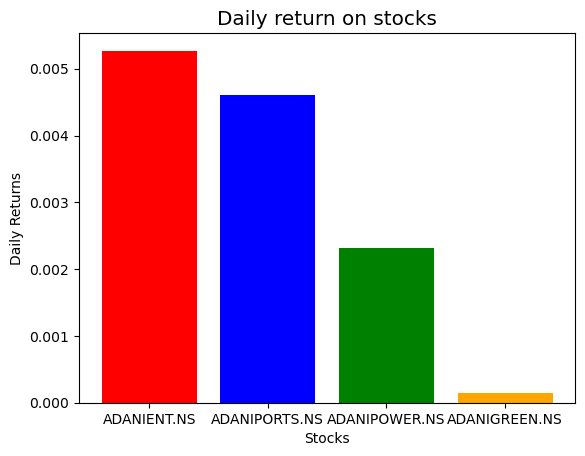

In [8]:
import datetime as dt
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

tickers = ["AMZN","MSFT","BHEL.NS","GOOG"]
start = dt.datetime.today()-dt.timedelta(60)
end = dt.datetime.today()
cl_price = pd.DataFrame() # empty dataframe which will be filled with closing prices of each stock

# looping over tickers and creating a dataframe with close prices
for ticker in adani_stocks:
    cl_price[ticker] = yf.download(ticker,start,end)["Adj Close"]
    
#dropping NaN values
cl_price.dropna(axis=0,how='any',inplace=True)

# Return calculation
daily_return = cl_price.pct_change() #Creates dataframe with daily return for each stock
 
# Pyplot demo
fig, ax = plt.subplots()
plt.style.available
plt.style.use('ggplot')
ax.set(title="Daily return on stocks", xlabel="Stocks", ylabel = "Daily Returns")
plt.bar(daily_return.columns,daily_return.mean(),color=["red","blue","green","orange"]);


Lets see what would be the current value of investing 1 rupee on 2022-12-08 in the following stocks

In [9]:
(1 + daily_return).cumprod().tail(1).round(2)

,ADANIENT.NS,ADANIPORTS.NS,ADANIPOWER.NS,ADANIGREEN.NS
Date,,,,
2023-04-06,1.12,1.18,1.05,0.96


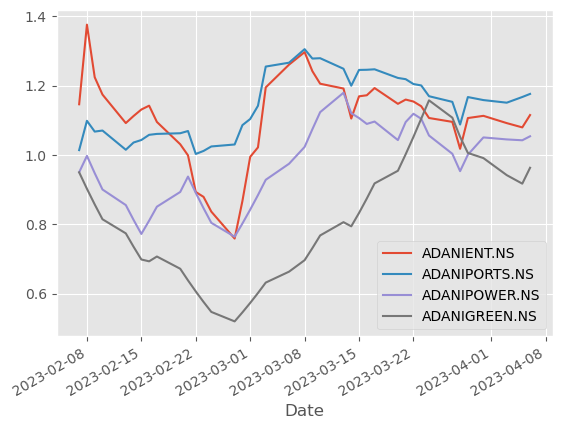

In [10]:
(1 + daily_return).cumprod().plot();